In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/football/players_20.csv")
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [3]:
df['gk_diving']=df.gk_diving.fillna(df.gk_diving.mean())
df['gk_handling']=df.gk_handling.fillna(df.gk_handling.mean())
df['gk_kicking']=df.gk_kicking.fillna(df.gk_kicking.mean())
df['gk_reflexes']=df.gk_reflexes.fillna(df.gk_reflexes.mean())
df['gk_speed']=df.gk_speed.fillna(df.gk_speed.mean())
df['gk_positioning']=df.gk_positioning.fillna(df.gk_positioning.mean())
df['pace']=df.pace.fillna(df.pace.mean())
df['shooting']=df.shooting.fillna(df.shooting.mean())
df['passing']=df.passing.fillna(df.passing.mean())
df['defending']=df.defending.fillna(df.defending.mean())
df['physic']=df.physic.fillna(df.physic.mean())
df['dribbling']=df.dribbling.fillna(df.dribbling.mean())

df['nation_position']=df.nation_position.fillna(df.nation_position.value_counts().index[0])
df['team_position']=df.team_position.fillna(df.team_position.value_counts().index[0])

In [4]:
columns = ['sofifa_id','short_name','pace', 'defending', 'passing', 'shooting', 'dribbling', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed','gk_diving' ,'gk_positioning', 'overall']
df = df[columns]
df.head()
df.isnull().values.any()

False

In [5]:
df = df.to_numpy()

In [6]:
df.shape

(18278, 14)

In [7]:
import random
np.random.shuffle(df)
df


array([[197061, 'J. Matip', 61.0, ..., 65.42239685658153,
        63.37475442043222, 82],
       [238559, 'S. Mai', 40.0, ..., 65.42239685658153,
        63.37475442043222, 65],
       [212680, 'J. Jones', 91.0, ..., 65.42239685658153,
        63.37475442043222, 72],
       ...,
       [234980, 'Y. Shakhov', 70.0, ..., 65.42239685658153,
        63.37475442043222, 71],
       [244251, 'A. Turgeman', 72.0, ..., 65.42239685658153,
        63.37475442043222, 67],
       [244727, 'L. Tawamba', 75.0, ..., 65.42239685658153,
        63.37475442043222, 75]], dtype=object)

In [8]:
df.shape

(18278, 14)

In [9]:
split = (70 , 30) 

In [10]:
train_dataset_split = int(df.shape[0]* split[0]/100)
train_dataset_split

12794

In [11]:
train_dataset = df[:train_dataset_split]

In [12]:
test_dataset = df[train_dataset_split:]

In [13]:
train_dataset[:3]

array([[197061, 'J. Matip', 61.0, 83.0, 68.0, 46.0, 67.0,
        63.146365422396855, 61.832514734774065, 66.39047151277013,
        37.79862475442043, 65.42239685658153, 63.37475442043222, 82],
       [238559, 'S. Mai', 40.0, 63.0, 42.0, 58.0, 52.0,
        63.146365422396855, 61.832514734774065, 66.39047151277013,
        37.79862475442043, 65.42239685658153, 63.37475442043222, 65],
       [212680, 'J. Jones', 91.0, 40.0, 66.0, 57.0, 76.0,
        63.146365422396855, 61.832514734774065, 66.39047151277013,
        37.79862475442043, 65.42239685658153, 63.37475442043222, 72]],
      dtype=object)

In [14]:
X_train = train_dataset[:,2:-1]
X_train[:3]

array([[61.0, 83.0, 68.0, 46.0, 67.0, 63.146365422396855,
        61.832514734774065, 66.39047151277013, 37.79862475442043,
        65.42239685658153, 63.37475442043222],
       [40.0, 63.0, 42.0, 58.0, 52.0, 63.146365422396855,
        61.832514734774065, 66.39047151277013, 37.79862475442043,
        65.42239685658153, 63.37475442043222],
       [91.0, 40.0, 66.0, 57.0, 76.0, 63.146365422396855,
        61.832514734774065, 66.39047151277013, 37.79862475442043,
        65.42239685658153, 63.37475442043222]], dtype=object)

In [15]:
y_train = train_dataset[:,-1].reshape(-1, 1)
y_train

array([[82],
       [65],
       [72],
       ...,
       [60],
       [62],
       [56]], dtype=object)

In [16]:
X_test = test_dataset[:,2:-1]
X_test[0:3]

array([[84.0, 72.0, 71.0, 69.0, 75.0, 63.146365422396855,
        61.832514734774065, 66.39047151277013, 37.79862475442043,
        65.42239685658153, 63.37475442043222],
       [58.0, 61.0, 58.0, 48.0, 63.0, 63.146365422396855,
        61.832514734774065, 66.39047151277013, 37.79862475442043,
        65.42239685658153, 63.37475442043222],
       [64.0, 74.0, 59.0, 44.0, 66.0, 63.146365422396855,
        61.832514734774065, 66.39047151277013, 37.79862475442043,
        65.42239685658153, 63.37475442043222]], dtype=object)

In [17]:
y_test = test_dataset[:,-1].reshape(-1, 1)
y_test

array([[76],
       [62],
       [74],
       ...,
       [71],
       [67],
       [75]], dtype=object)

#*Prediction using XGBOOST algorithm*

In [18]:
import xgboost as xgb

In [19]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [20]:
predict = xgb_model.predict(X_test)
predict

array([75.95888 , 63.822598, 73.46992 , ..., 70.91526 , 66.8435  ,
       73.32599 ], dtype=float32)

In [21]:
xgb_model.score(X_train,y_train) * 100

95.41639591959532

In [22]:
xgb_model.score(X_test,y_test) *100

94.88649809435647

In [23]:
test_dataset[:,[1,-1]].shape

(5484, 2)

In [24]:
predict1 = predict.reshape(-1,1)

In [25]:
prediction_df = np.concatenate((test_dataset[:,[1,-1]],predict1), axis = 1)
prediction_df

array([['Léo Matos', 76, 75.95887756347656],
       ['M. Ambrosiewicz', 62, 63.82259750366211],
       ['Marlon', 74, 73.46991729736328],
       ...,
       ['Y. Shakhov', 71, 70.9152603149414],
       ['A. Turgeman', 67, 66.84349822998047],
       ['L. Tawamba', 75, 73.32598876953125]], dtype=object)

0.041853781005708884
AxesSubplot(0.125,0.125;0.775x0.755)


,name,rating,prediction,difference,normalized_rating,normalized_prediction,squared_difference,rounded_prediction,normalized_rounded_prediction
5283,H. Salem,56,55.9996,0.000415802,0.195122,0.162549,0.001061,56,0.157895
4780,Oleaga,61,60.9995,0.000488281,0.317073,0.2925,0.000603861,61,0.289474
5198,C. Burke,69,68.9994,0.000556946,0.512195,0.500422,0.000138613,69,0.500000
3253,S. Mendoza,73,73.001,0.000991821,0.609756,0.604424,2.8432e-05,73,0.605263
2703,Diego Castro,76,76.0011,0.00108337,0.682927,0.682398,2.79898e-07,76,0.684211
...,...,...,...,...,...,...,...,...,...
4571,E. Cavani,88,81.8194,6.18065,0.97561,0.833617,0.0201618,82,0.842105
892,G. Bruna,54,60.4446,6.44465,0.146341,0.278078,0.0173546,60,0.263158
3220,Vagnão Junior,64,70.8412,6.84117,0.390244,0.548289,0.0249783,71,0.552632
417,Z. Alkurt,50,57.3962,7.39616,0.0487805,0.198847,0.0225198,57,0.184211


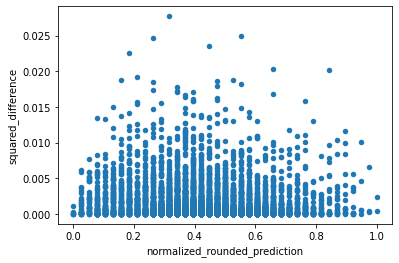

In [26]:
rating_df = pd.DataFrame(data=prediction_df,columns=['name', 'rating', 'prediction'])
rating_df['difference'] = abs(rating_df['rating'] - rating_df['prediction'])
rating_df = rating_df.sort_values(by='difference')
rating_df['normalized_rating'] = ((rating_df['rating'] -  rating_df['rating'].min())/(rating_df['rating'].max() - rating_df['rating'].min()))
rating_df['normalized_prediction'] = ((rating_df['prediction'] -  rating_df['prediction'].min())/(rating_df['prediction'].max() - rating_df['prediction'].min()))
rating_df['squared_difference'] = (rating_df['normalized_prediction'] - rating_df['normalized_rating']) ** 2
rating_df['rounded_prediction'] = rating_df['prediction'].astype(float).round(decimals=0).astype('int32')
rating_df['normalized_rounded_prediction'] = ((rating_df['rounded_prediction'] -  rating_df['rounded_prediction'].min())/(rating_df['rounded_prediction'].max() - rating_df['rounded_prediction'].min()))

print(np.sqrt(rating_df['squared_difference'].sum()/len(rating_df)))
print(rating_df.plot.scatter(x='normalized_rounded_prediction', y='squared_difference'))
rating_df

In [27]:
len(rating_df)

5484

In [28]:
rating_df.iloc[5000]

name                              Mário Rui
rating                                   79
prediction                          76.3225
difference                          2.67754
normalized_rating                  0.756098
normalized_prediction              0.690751
squared_difference               0.00427022
rounded_prediction                       76
normalized_rounded_prediction      0.684211
Name: 5306, dtype: object

#*Predicting values using linear regression*

In [29]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
normalized_train_dataset = min_max_scaler.fit_transform(X_train)
normalized_train_dataset

array([[0.50704225, 0.90666667, 0.64705882, ..., 0.4867665 , 0.46570428,
        0.44749509],
       [0.21126761, 0.64      , 0.26470588, ..., 0.4867665 , 0.46570428,
        0.44749509],
       [0.92957746, 0.33333333, 0.61764706, ..., 0.4867665 , 0.46570428,
        0.44749509],
       ...,
       [0.45070423, 0.56      , 0.47058824, ..., 0.4867665 , 0.46570428,
        0.44749509],
       [0.43661972, 0.62666667, 0.45588235, ..., 0.4867665 , 0.46570428,
        0.44749509],
       [0.54929577, 0.17333333, 0.33823529, ..., 0.4867665 , 0.46570428,
        0.44749509]])

In [30]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
normalized_ytrain_dataset = min_max_scaler.fit_transform(y_train)
normalized_ytrain_dataset

array([[0.73913043],
       [0.36956522],
       [0.52173913],
       ...,
       [0.26086957],
       [0.30434783],
       [0.17391304]])

In [31]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
normalized_test_dataset = min_max_scaler.fit_transform(X_test)
normalized_test_dataset

array([[0.83333333, 0.75675676, 0.71212121, ..., 0.47497135, 0.45383104,
        0.45478201],
       [0.47222222, 0.60810811, 0.51515152, ..., 0.47497135, 0.45383104,
        0.45478201],
       [0.55555556, 0.78378378, 0.53030303, ..., 0.47497135, 0.45383104,
        0.45478201],
       ...,
       [0.63888889, 0.66216216, 0.65151515, ..., 0.47497135, 0.45383104,
        0.45478201],
       [0.66666667, 0.13513514, 0.28787879, ..., 0.47497135, 0.45383104,
        0.45478201],
       [0.70833333, 0.10810811, 0.37878788, ..., 0.47497135, 0.45383104,
        0.45478201]])

In [32]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
normalized_ytest_dataset = min_max_scaler.fit_transform(y_test)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import datasets,linear_model

In [34]:
linear_regression = LinearRegression()
linear_regression.fit(normalized_train_dataset,normalized_ytrain_dataset)
prediction = linear_regression.predict(normalized_test_dataset)
prediction

array([[0.67298806],
       [0.44942966],
       [0.51108609],
       ...,
       [0.60933219],
       [0.36722997],
       [0.41356199]])

In [35]:
normalized_ytest_dataset

array([[0.68292683],
       [0.34146341],
       [0.63414634],
       ...,
       [0.56097561],
       [0.46341463],
       [0.65853659]])

In [36]:
test_set_rmse = (mean_squared_error(normalized_ytest_dataset, prediction, squared=False))
test_set_rmse

0.10120641512862241

In [37]:
normalized_ytest_dataset

array([[0.68292683],
       [0.34146341],
       [0.63414634],
       ...,
       [0.56097561],
       [0.46341463],
       [0.65853659]])

In [38]:
prediction_linear = np.concatenate((test_dataset[:,[1,-1]],normalized_ytest_dataset), axis = 1)
prediction_linear = np.concatenate((prediction_linear, prediction), axis=1)
prediction_linear[1]

array(['M. Ambrosiewicz', 62, 0.3414634146341462, 0.44942965742650487],
      dtype=object)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


,name,true_y,normalized_true_y,predicted_value_linear,squared_linear_difference,unnormalized_prediction,normalized_predict_values
0,Léo Matos,76,0.682927,0.672988,0.00993877,75.5925,0.710526
1,M. Ambrosiewicz,62,0.341463,0.44943,0.107966,66.4266,0.447368
2,Marlon,74,0.634146,0.511086,0.12306,68.9545,0.526316
3,Juan Dominguez,69,0.512195,0.540073,0.0278776,70.143,0.552632
4,A. Aguilar,74,0.634146,0.602729,0.0314169,72.7119,0.631579
...,...,...,...,...,...,...,...
5479,N. Delfouneso,63,0.365854,0.358956,0.00689788,62.7172,0.368421
5480,E. Besea,60,0.292683,0.36004,0.0673574,62.7617,0.368421
5481,Y. Shakhov,71,0.560976,0.609332,0.0483566,72.9826,0.631579
5482,A. Turgeman,67,0.463415,0.36723,0.0961847,63.0564,0.368421


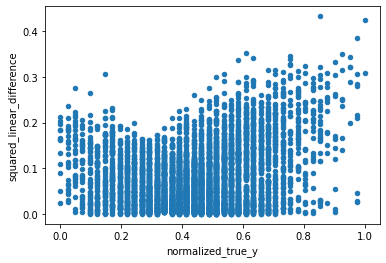

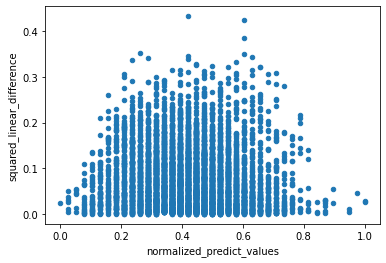

In [40]:
rating_df_all = pd.DataFrame(data=prediction_linear,columns=['name', 'true_y', 'normalized_true_y', 'predicted_value_linear'])
rating_df_all['squared_linear_difference'] = abs(rating_df_all['normalized_true_y'] - rating_df_all['predicted_value_linear'])
rating_df_all['unnormalized_prediction'] = (rating_df_all['predicted_value_linear'])*(rating_df_all['true_y'].max() - rating_df_all['true_y'].min()) + rating_df_all['true_y'].min()

normalized_predicted_value = rating_df_all['unnormalized_prediction'].astype(float).round(decimals=0).astype('int32')
rating_df_all['normalized_predict_values'] = (normalized_predicted_value - normalized_predicted_value.min())/(normalized_predicted_value.max() - normalized_predicted_value.min())
print(rating_df_all.plot.scatter(x='normalized_true_y', y='squared_linear_difference'))

print(rating_df_all.plot.scatter(x='normalized_predict_values', y='squared_linear_difference'))
rating_df_all



#*Comparing both the algorithms*

In [42]:
xgboost_linear_merged = rating_df.merge(rating_df_all, on='name')
xgboost_linear = xgboost_linear_merged[['name', 'rating','prediction','unnormalized_prediction']]
xgboost_linear.columns = ['name', 'player_rating','xgboost_prediction','linear_reg_prediction']
xgboost_linear

,name,player_rating,xgboost_prediction,linear_reg_prediction
0,H. Salem,56,55.9996,57.5525
1,Oleaga,61,60.9995,61.2603
2,C. Burke,69,68.9994,66.7724
3,S. Mendoza,73,73.001,66.2073
4,Diego Castro,76,76.0011,71.4008
...,...,...,...,...
5701,E. Cavani,88,81.8194,76.5177
5702,G. Bruna,54,60.4446,61.1515
5703,Vagnão Junior,64,70.8412,65.0942
5704,Z. Alkurt,50,57.3962,57.5285


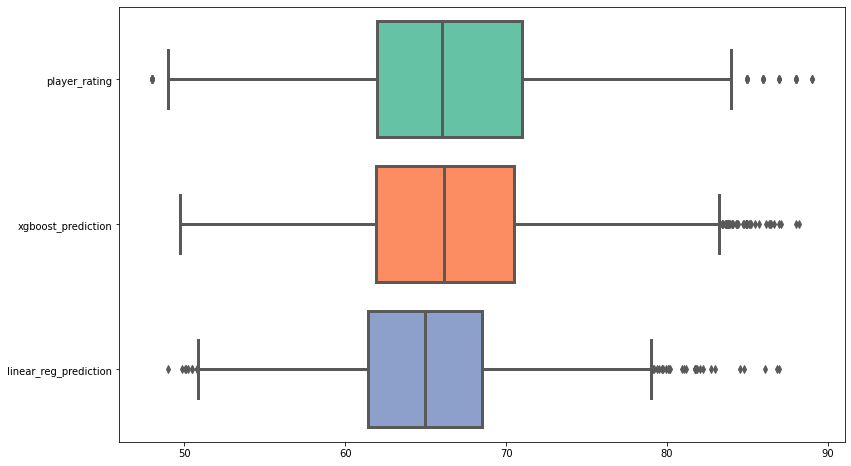

In [43]:
plt.figure(figsize=(13,8))
ax = sns.boxplot(data = xgboost_linear, orient="h", palette="Set2",linewidth=3 ,saturation =1)